# DSA210 Term Project: Colorectal Cancer Survival Analysis 

In [130]:
import pandas as pd
import numpy as np
df = pd.read_excel("DSA210_data.xlsx")

## Data Preprocessing & Enrichment

In [132]:
df.head()

Patient_ID Country  Age Gender Cancer_Stage  Tumor_Size_mm Family_History  \
0           1      UK   77      M    Localized             69             No   
1           2      UK   59      M    Localized             33             No   
2           3   Japan   66      M     Regional             17             No   
3           4     USA   83      M     Regional             14             No   
4           5  France   66      M    Localized             34             No   

  Smoking_History Alcohol_Consumption Obesity_BMI  ... Survival_5_years  \
0              No                 Yes  Overweight  ...              Yes   
1              No                  No  Overweight  ...              Yes   
2             Yes                  No      Normal  ...              Yes   
3              No                  No       Obese  ...              Yes   
4             Yes                  No      Normal  ...              Yes   

  Mortality Healthcare_Costs Incidence_Rate_per_100K Mortality_Rate_per_100K  \
0        No            54413                      50                       5   
1        No            76553                      37                      25   
2        No            62805                      54                      27   
3        No            89393                      45                      11   
4        No            66425                      15                      27   

  Urban_or_Rural Economic_Classification Healthcare_Access Insurance_Status  \
0          Urban               Developed          Moderate          Insured   
1          Urban              Developing              High        Uninsured   
2          Urban               Developed          Moderate        Uninsured   
3          Urban               Developed          Moderate          Insured   
4          Urban              Developing              High          Insured   

  Survival_Prediction  
0                 Yes  
1                 Yes  
2                  No  
3                 Yes  
4                 Yes  

[5 rows x 28 columns]

In [133]:
df.info() # to understand the data and what are the parameters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Patient_ID                  20000 non-null  int64 
 1   Country                     20000 non-null  object
 2   Age                         20000 non-null  int64 
 3   Gender                      20000 non-null  object
 4   Cancer_Stage                20000 non-null  object
 5   Tumor_Size_mm               20000 non-null  int64 
 6   Family_History              20000 non-null  object
 7   Smoking_History             20000 non-null  object
 8   Alcohol_Consumption         20000 non-null  object
 9   Obesity_BMI                 20000 non-null  object
 10  Diet_Risk                   20000 non-null  object
 11  Physical_Activity           20000 non-null  object
 12  Diabetes                    20000 non-null  object
 13  Inflammatory_Bowel_Disease  20000 non-null  ob

In [134]:
df.describe() # what are the descriptive statistics?

Patient_ID           Age  Tumor_Size_mm  Healthcare_Costs  \
count  20000.000000  20000.000000   20000.000000      20000.000000   
mean   10000.500000     69.138300      42.045600      72309.307600   
std     5773.647028     11.866845      21.724811      27558.797301   
min        1.000000     30.000000       5.000000      25000.000000   
25%     5000.750000     59.000000      23.000000      48406.750000   
50%    10000.500000     69.000000      42.000000      72139.500000   
75%    15000.250000     79.000000      61.000000      96454.000000   
max    20000.000000     89.000000      79.000000     119994.000000   

       Incidence_Rate_per_100K  Mortality_Rate_per_100K  
count             20000.000000             20000.000000  
mean                 34.398100                17.042550  
std                  14.367217                 7.222247  
min                  10.000000                 5.000000  
25%                  22.000000                11.000000  
50%                  34.000000                17.000000  
75%                  47.000000                23.000000  
max                  59.000000                29.000000

In [135]:
# Define a function to assign age distribution score based on age
def get_age_distribution_score(age):
    if 0 <= age <= 19:
        return 0.00044
    elif 20 <= age <= 44:
        return 0.02015
    elif 45 <= age <= 69:
        return 0.40631
    elif age >= 70:
        return 0.57310

In [141]:
######### Apply the age distibution score, with function

In [143]:
df['age_distribution_score'] = df['Age'].apply(get_age_distribution_score)

In [145]:
df[['Age','age_distribution_score']].head(8)

Age  age_distribution_score
0   77                 0.57310
1   59                 0.40631
2   66                 0.40631
3   83                 0.57310
4   66                 0.40631
5   69                 0.40631
6   79                 0.57310
7   89                 0.57310

In [147]:
# Dictionary mapping countries to their ASR scores
country_asr_mapping = {
    'China': 20.1,
    'USA': 27.0,
    'Japan': 36.6,
    'Russia': 29.4,
    'India': 4.9,
    'Germany': 25.7,
    'Brazil': 19.8,
    'Italy': 30.6,
    'France': 32.1,
    'UK': 30.9
}

# Map the country names to the corresponding ASR score
df['Country_ASR_Score'] = df['Country'].map(country_asr_mapping)

In [149]:
df['Country_ASR_Score'] = df['Country'].map(country_asr_mapping).fillna(0)  
# or use np.nan for missing values

In [151]:
df[['Country','Country_ASR_Score']].head(8)

Country  Country_ASR_Score
0       UK               30.9
1       UK               30.9
2    Japan               36.6
3      USA               27.0
4   France               32.1
5    Japan               36.6
6   Canada                0.0
7  Germany               25.7

In [153]:
df.shape

(20000, 30)

In [155]:
df.dtypes

Patient_ID                      int64
Country                        object
Age                             int64
Gender                         object
Cancer_Stage                   object
Tumor_Size_mm                   int64
Family_History                 object
Smoking_History                object
Alcohol_Consumption            object
Obesity_BMI                    object
Diet_Risk                      object
Physical_Activity              object
Diabetes                       object
Inflammatory_Bowel_Disease     object
Genetic_Mutation               object
Screening_History              object
Early_Detection                object
Treatment_Type                 object
Survival_5_years               object
Mortality                      object
Healthcare_Costs                int64
Incidence_Rate_per_100K         int64
Mortality_Rate_per_100K         int64
Urban_or_Rural                 object
Economic_Classification        object
Healthcare_Access              object
Insurance_St

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient_ID                  20000 non-null  int64  
 1   Country                     20000 non-null  object 
 2   Age                         20000 non-null  int64  
 3   Gender                      20000 non-null  object 
 4   Cancer_Stage                20000 non-null  object 
 5   Tumor_Size_mm               20000 non-null  int64  
 6   Family_History              20000 non-null  object 
 7   Smoking_History             20000 non-null  object 
 8   Alcohol_Consumption         20000 non-null  object 
 9   Obesity_BMI                 20000 non-null  object 
 10  Diet_Risk                   20000 non-null  object 
 11  Physical_Activity           20000 non-null  object 
 12  Diabetes                    20000 non-null  object 
 13  Inflammatory_Bowel_Disease  200

In [159]:
df.isnull().sum() / df.shape[0] #NaN Values

Patient_ID                    0.0
Country                       0.0
Age                           0.0
Gender                        0.0
Cancer_Stage                  0.0
Tumor_Size_mm                 0.0
Family_History                0.0
Smoking_History               0.0
Alcohol_Consumption           0.0
Obesity_BMI                   0.0
Diet_Risk                     0.0
Physical_Activity             0.0
Diabetes                      0.0
Inflammatory_Bowel_Disease    0.0
Genetic_Mutation              0.0
Screening_History             0.0
Early_Detection               0.0
Treatment_Type                0.0
Survival_5_years              0.0
Mortality                     0.0
Healthcare_Costs              0.0
Incidence_Rate_per_100K       0.0
Mortality_Rate_per_100K       0.0
Urban_or_Rural                0.0
Economic_Classification       0.0
Healthcare_Access             0.0
Insurance_Status              0.0
Survival_Prediction           0.0
age_distribution_score        0.0
Country_ASR_Sc

## Exploratory Data Analysis

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [163]:
import warnings

# To suppress all warnings
warnings.filterwarnings('ignore')

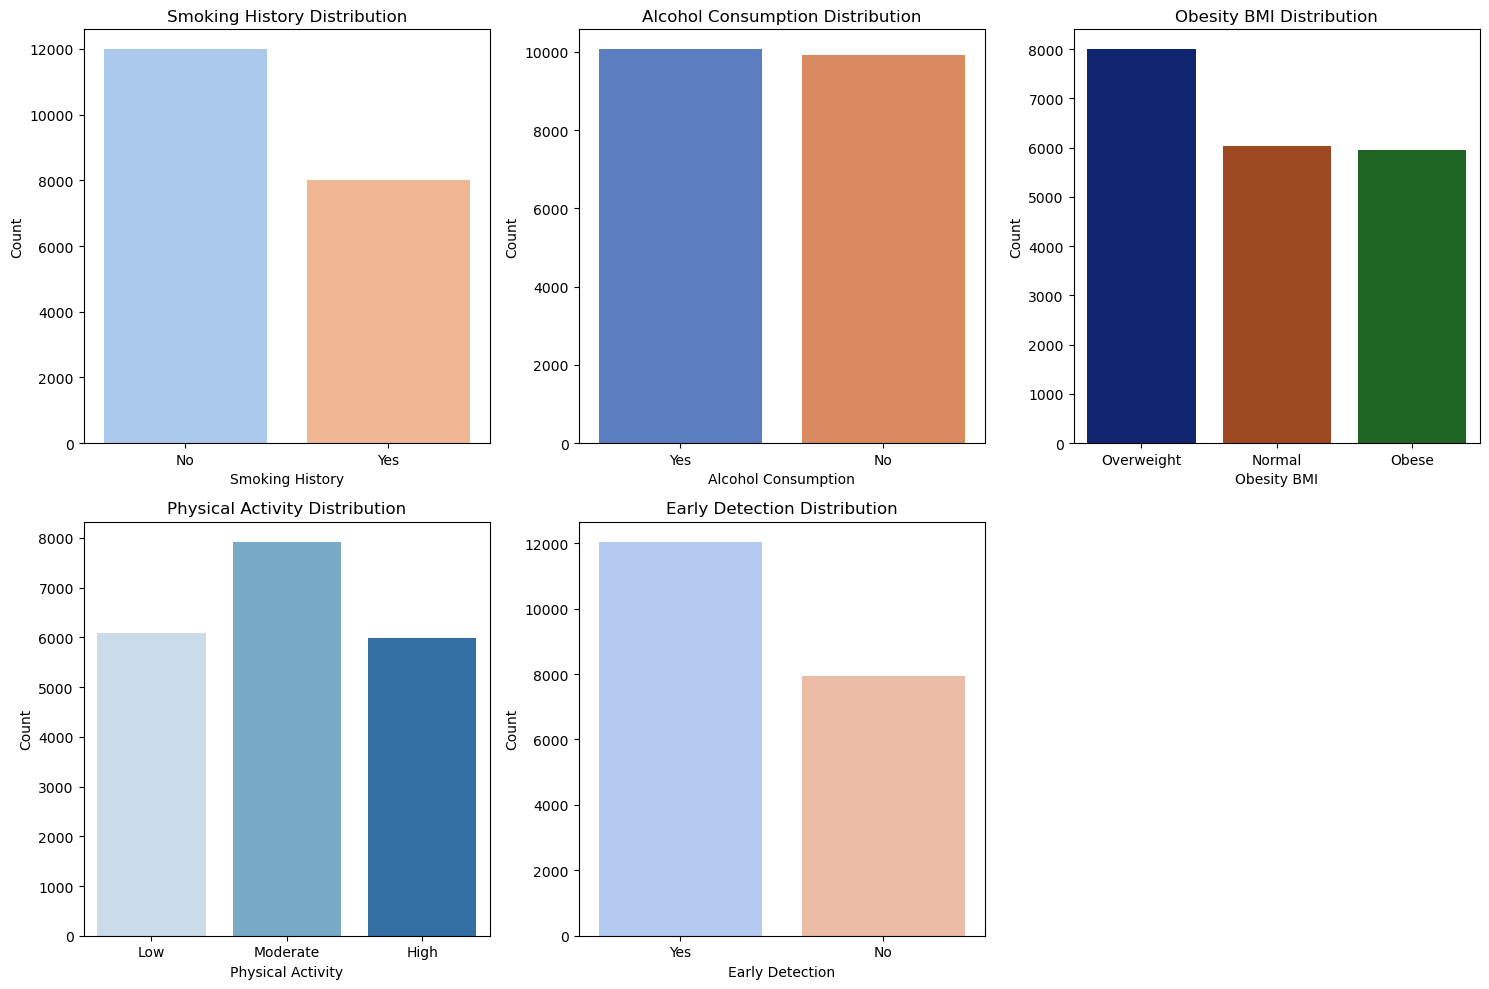

In [165]:
# Set the figure size for the subplots
plt.figure(figsize=(15, 10))

# Smoking History Distribution (Categorical)
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Smoking_History', palette='pastel')
plt.title('Smoking History Distribution')
plt.xlabel('Smoking History')
plt.ylabel('Count')

# Alcohol Consumption Distribution (Categorical)
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Alcohol_Consumption', palette='muted')
plt.title('Alcohol Consumption Distribution')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')

# Obesity BMI Distribution (Categorical)
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Obesity_BMI', palette='dark')
plt.title('Obesity BMI Distribution')
plt.xlabel('Obesity BMI')
plt.ylabel('Count')

# Physical Activity Distribution (Categorical)
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Physical_Activity', palette='Blues')
plt.title('Physical Activity Distribution')
plt.xlabel('Physical Activity')
plt.ylabel('Count')

# Early Detection Distribution (Categorical)
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Early_Detection', palette='coolwarm')
plt.title('Early Detection Distribution')
plt.xlabel('Early Detection')
plt.ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

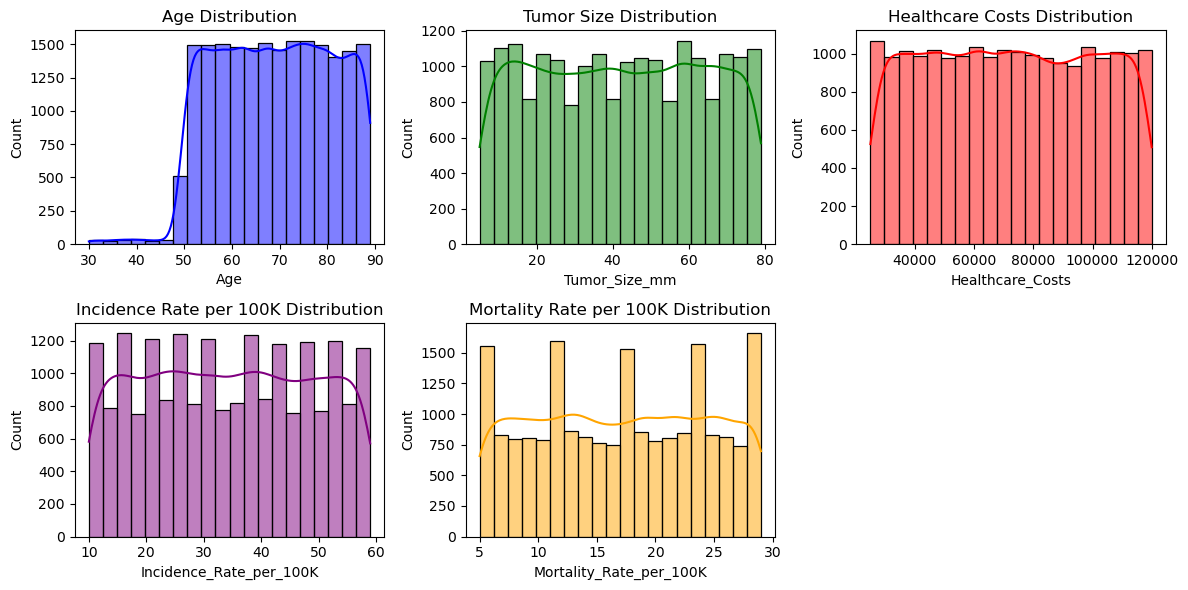

In [167]:
# 1. Distribution of Continuous Variables (e.g., Age, Tumor Size, Healthcare Costs)
plt.figure(figsize=(12, 6))

# Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')

# Tumor Size Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['Tumor_Size_mm'], bins=20, kde=True, color='green')
plt.title('Tumor Size Distribution')

# Healthcare Costs Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['Healthcare_Costs'], bins=20, kde=True, color='red')
plt.title('Healthcare Costs Distribution')

# Incidence Rate Distribution
plt.subplot(2, 3, 4)
sns.histplot(df['Incidence_Rate_per_100K'], bins=20, kde=True, color='purple')
plt.title('Incidence Rate per 100K Distribution')

# Mortality Rate Distribution
plt.subplot(2, 3, 5)
sns.histplot(df['Mortality_Rate_per_100K'], bins=20, kde=True, color='orange')
plt.title('Mortality Rate per 100K Distribution')

plt.tight_layout()
plt.show()

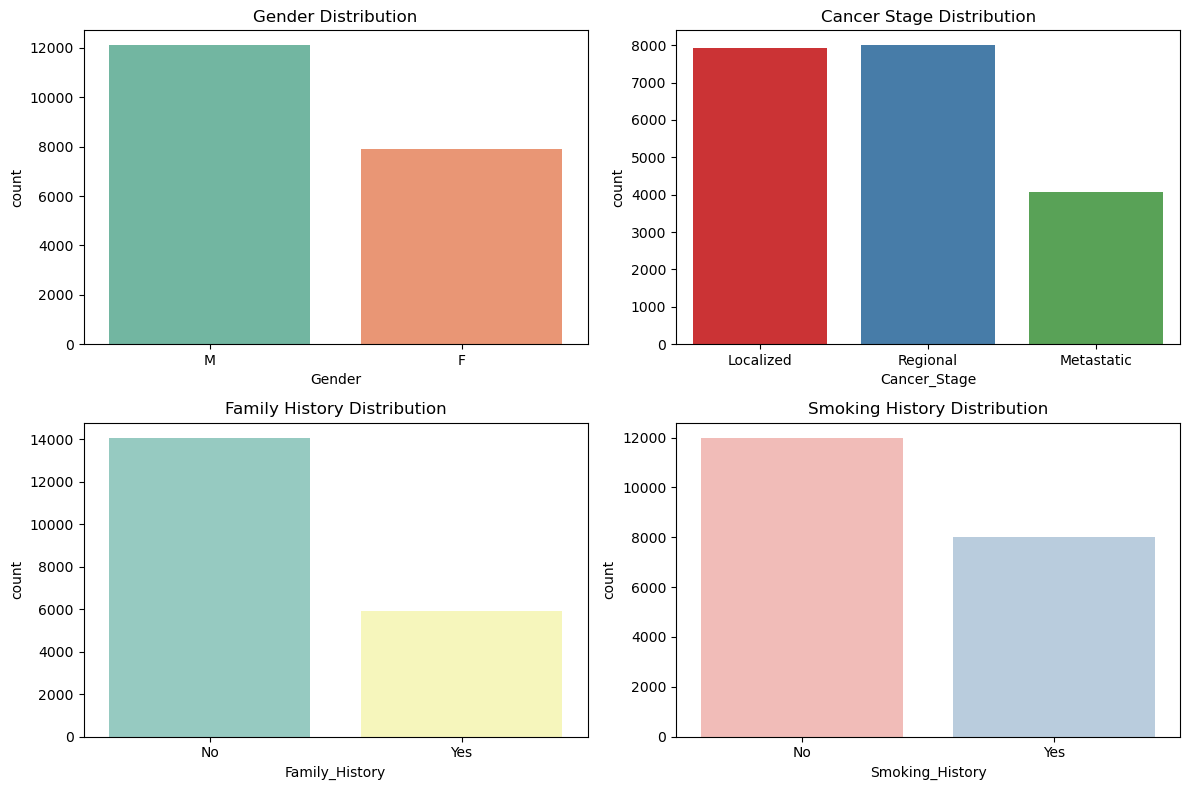

In [46]:
# 2. Bar plots for categorical data (e.g., Gender, Cancer Stage, Family History)
plt.figure(figsize=(12, 8))

# Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Gender', palette='Set2')  # Updated palette
plt.title('Gender Distribution')

# Cancer Stage Distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Cancer_Stage', palette='Set1')  # Updated palette
plt.title('Cancer Stage Distribution')

# Family History Distribution
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Family_History', palette='Set3')  # Updated palette
plt.title('Family History Distribution')

# Smoking History Distribution
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Smoking_History', palette='Pastel1')  # Updated palette
plt.title('Smoking History Distribution')

plt.tight_layout()
plt.show()


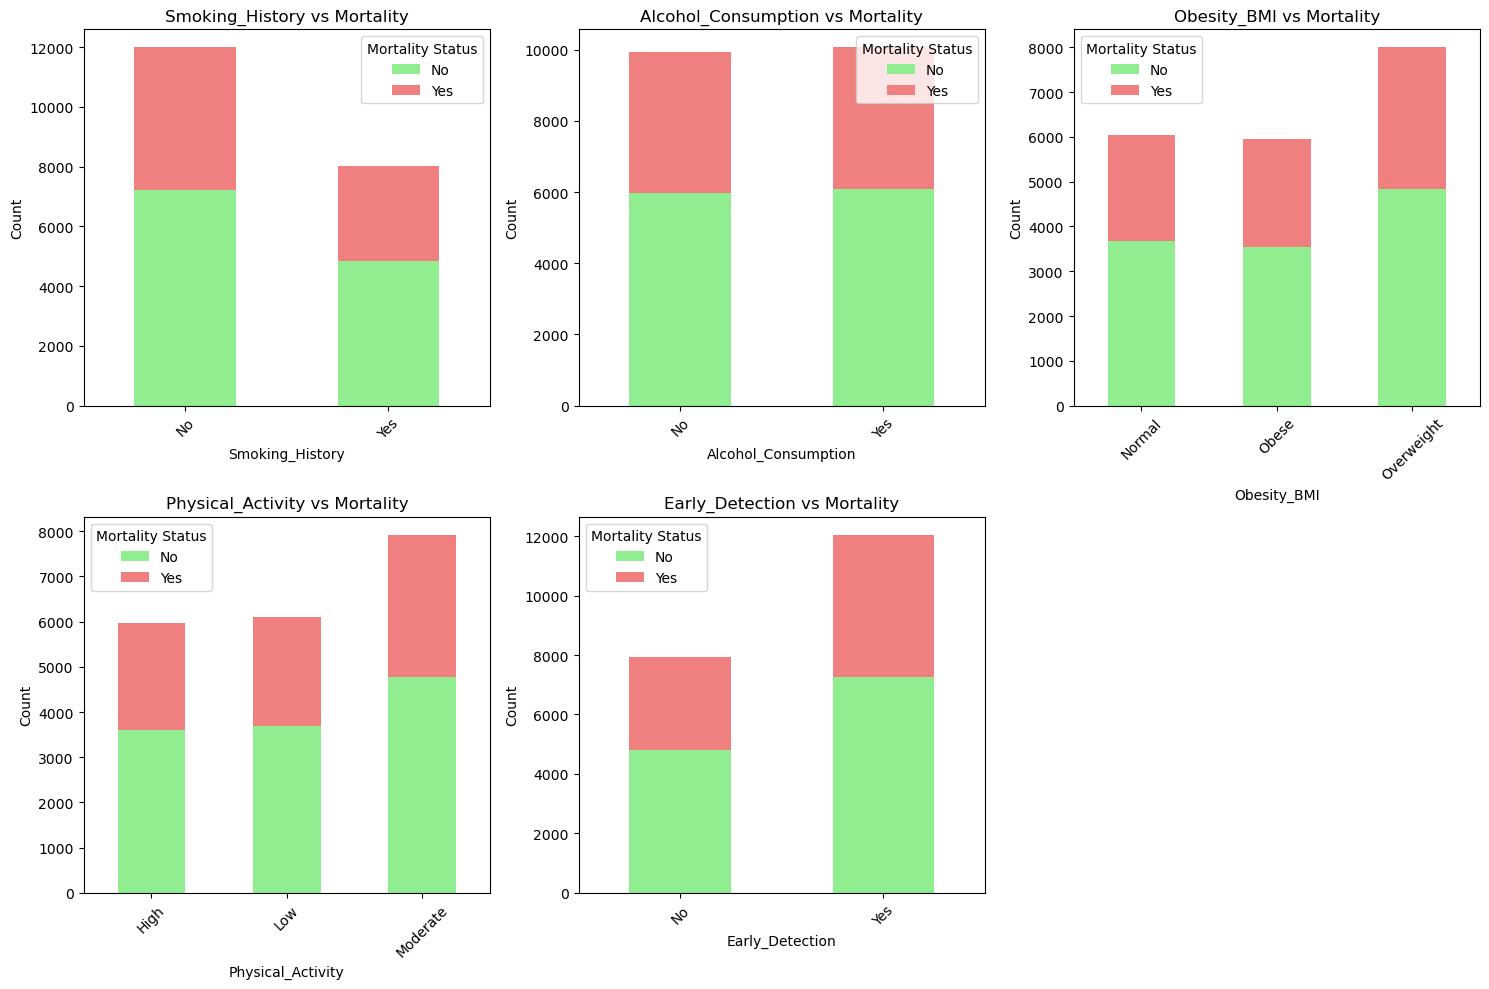

In [189]:
# Set the figure size for the subplots
plt.figure(figsize=(15, 10))

# List of categorical variables
categorical_vars = ['Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Physical_Activity', 'Early_Detection']

# Iterate through each categorical variable to create plots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    mortality_counts = df.groupby(var)['Mortality'].value_counts()
    mortality_counts.unstack().plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'], ax=plt.gca())
    plt.title(f'{var} vs Mortality')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title="Mortality Status")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


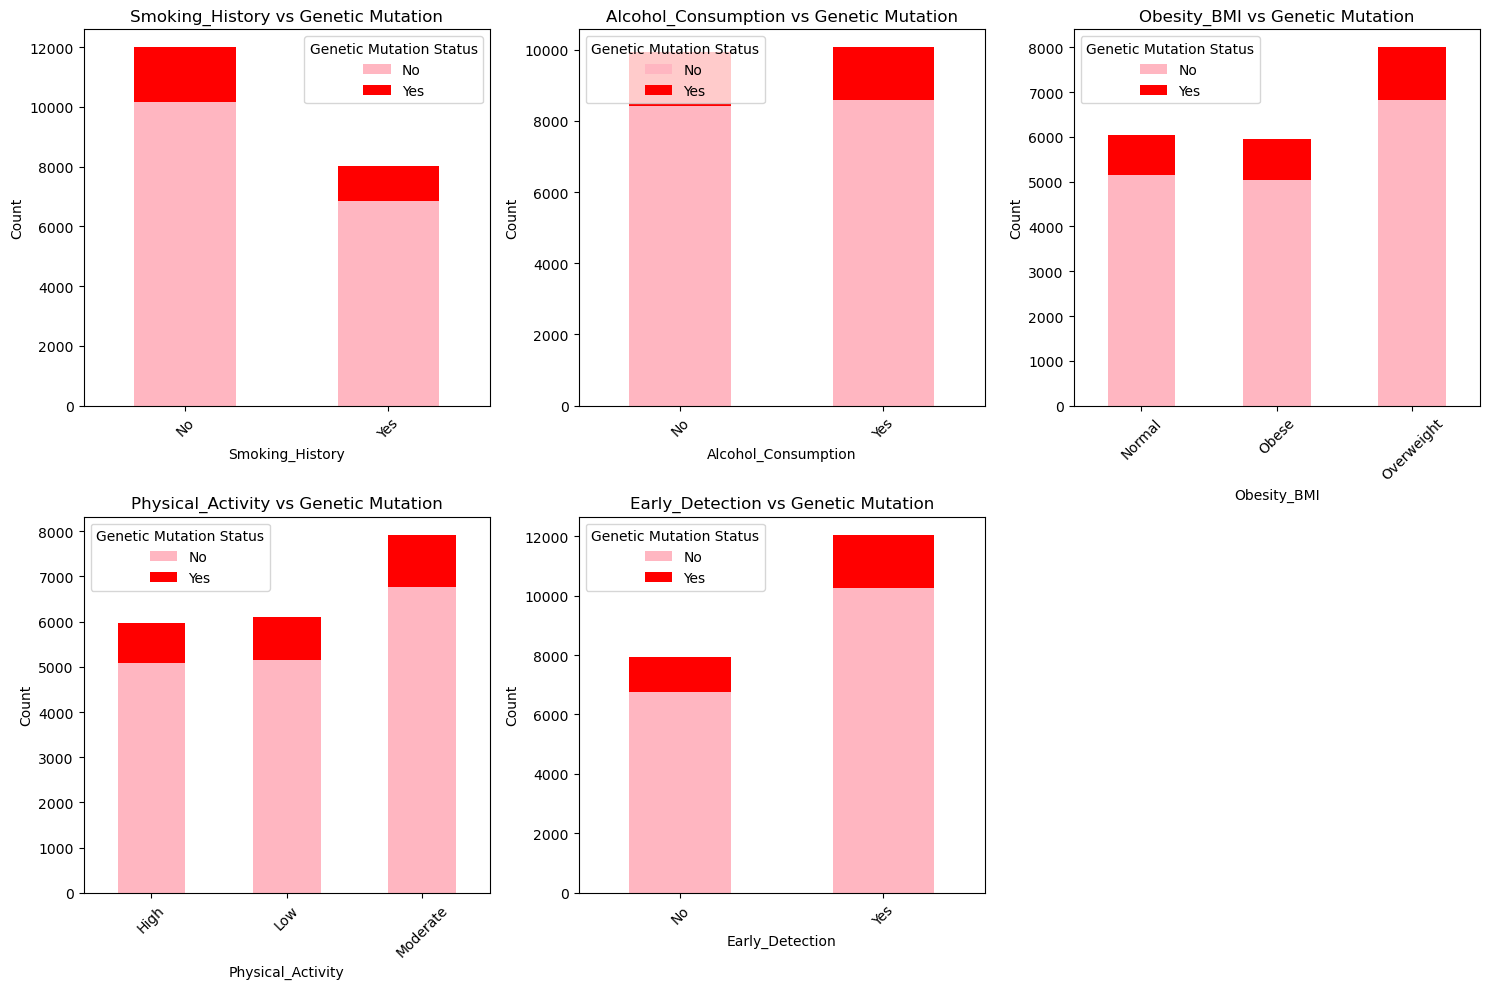

In [195]:
# Set the figure size for the subplots
plt.figure(figsize=(15, 10))

# List of categorical variables
categorical_vars = ['Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Physical_Activity', 'Early_Detection']

# Iterate through each categorical variable to create plots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    mortality_counts = df.groupby(var)['Genetic_Mutation'].value_counts()
    mortality_counts.unstack().plot(kind='bar', stacked=True, color=['lightpink', 'red'], ax=plt.gca())
    plt.title(f'{var} vs Genetic Mutation')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title="Genetic Mutation Status")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


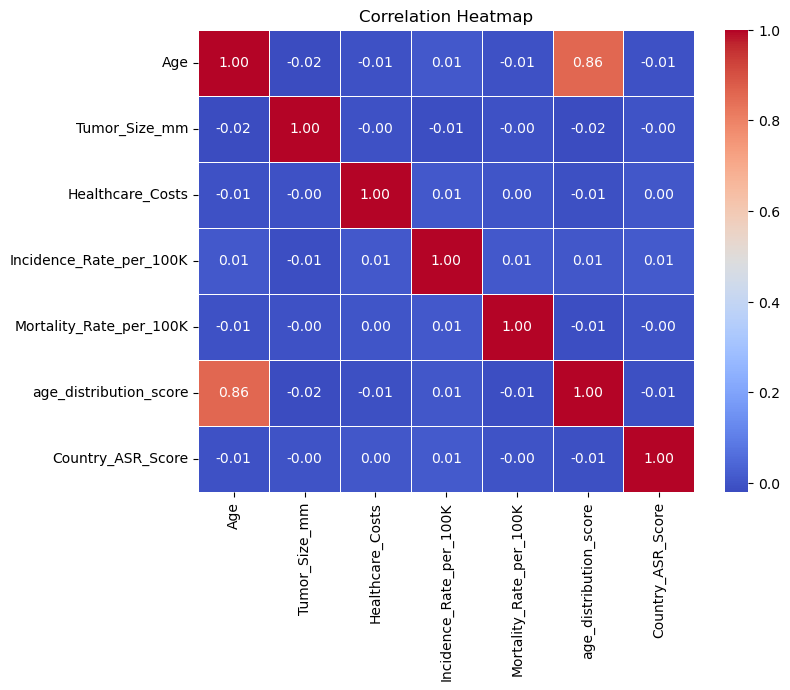

In [48]:
# 3. Correlation Heatmap (for continuous variables)
corr_matrix = df[['Age', 'Tumor_Size_mm', 'Healthcare_Costs', 
                  'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 
                  'age_distribution_score', 'Country_ASR_Score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

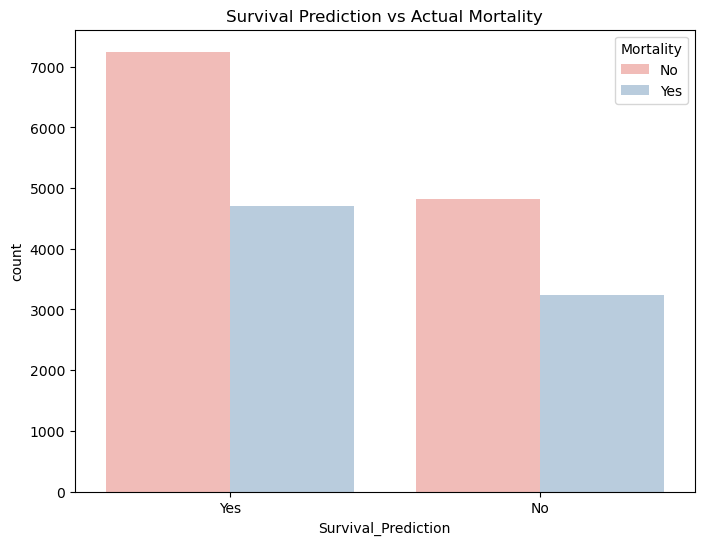

In [50]:
# 4. Survival Prediction vs Mortality (Count Plot)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survival_Prediction', hue='Mortality', palette='Pastel1')
plt.title('Survival Prediction vs Actual Mortality')
plt.show()

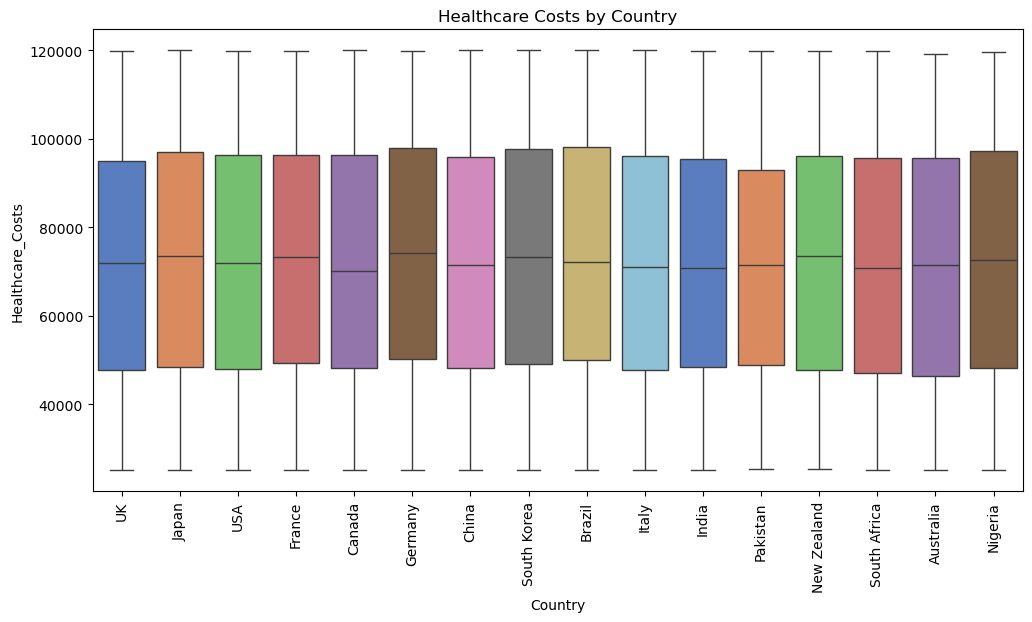

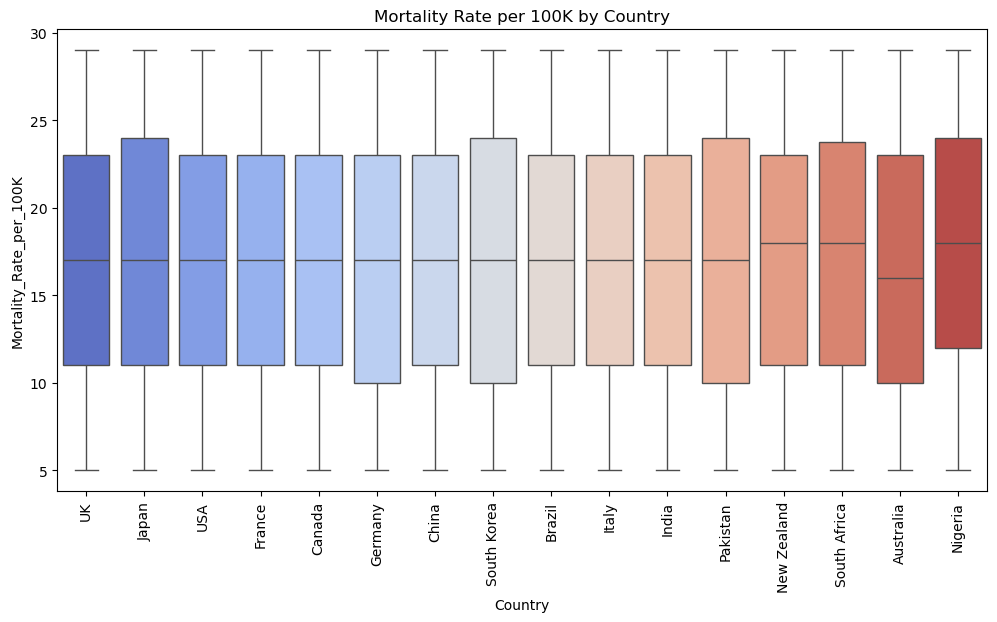

In [52]:
# 5. Country-Based Analysis (Example: Healthcare Costs by Country)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='Healthcare_Costs', palette='muted')
plt.title('Healthcare Costs by Country')
plt.xticks(rotation=90)
plt.show()

# Example: Mortality Rate by Country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='Mortality_Rate_per_100K', palette='coolwarm')
plt.title('Mortality Rate per 100K by Country')
plt.xticks(rotation=90)
plt.show()

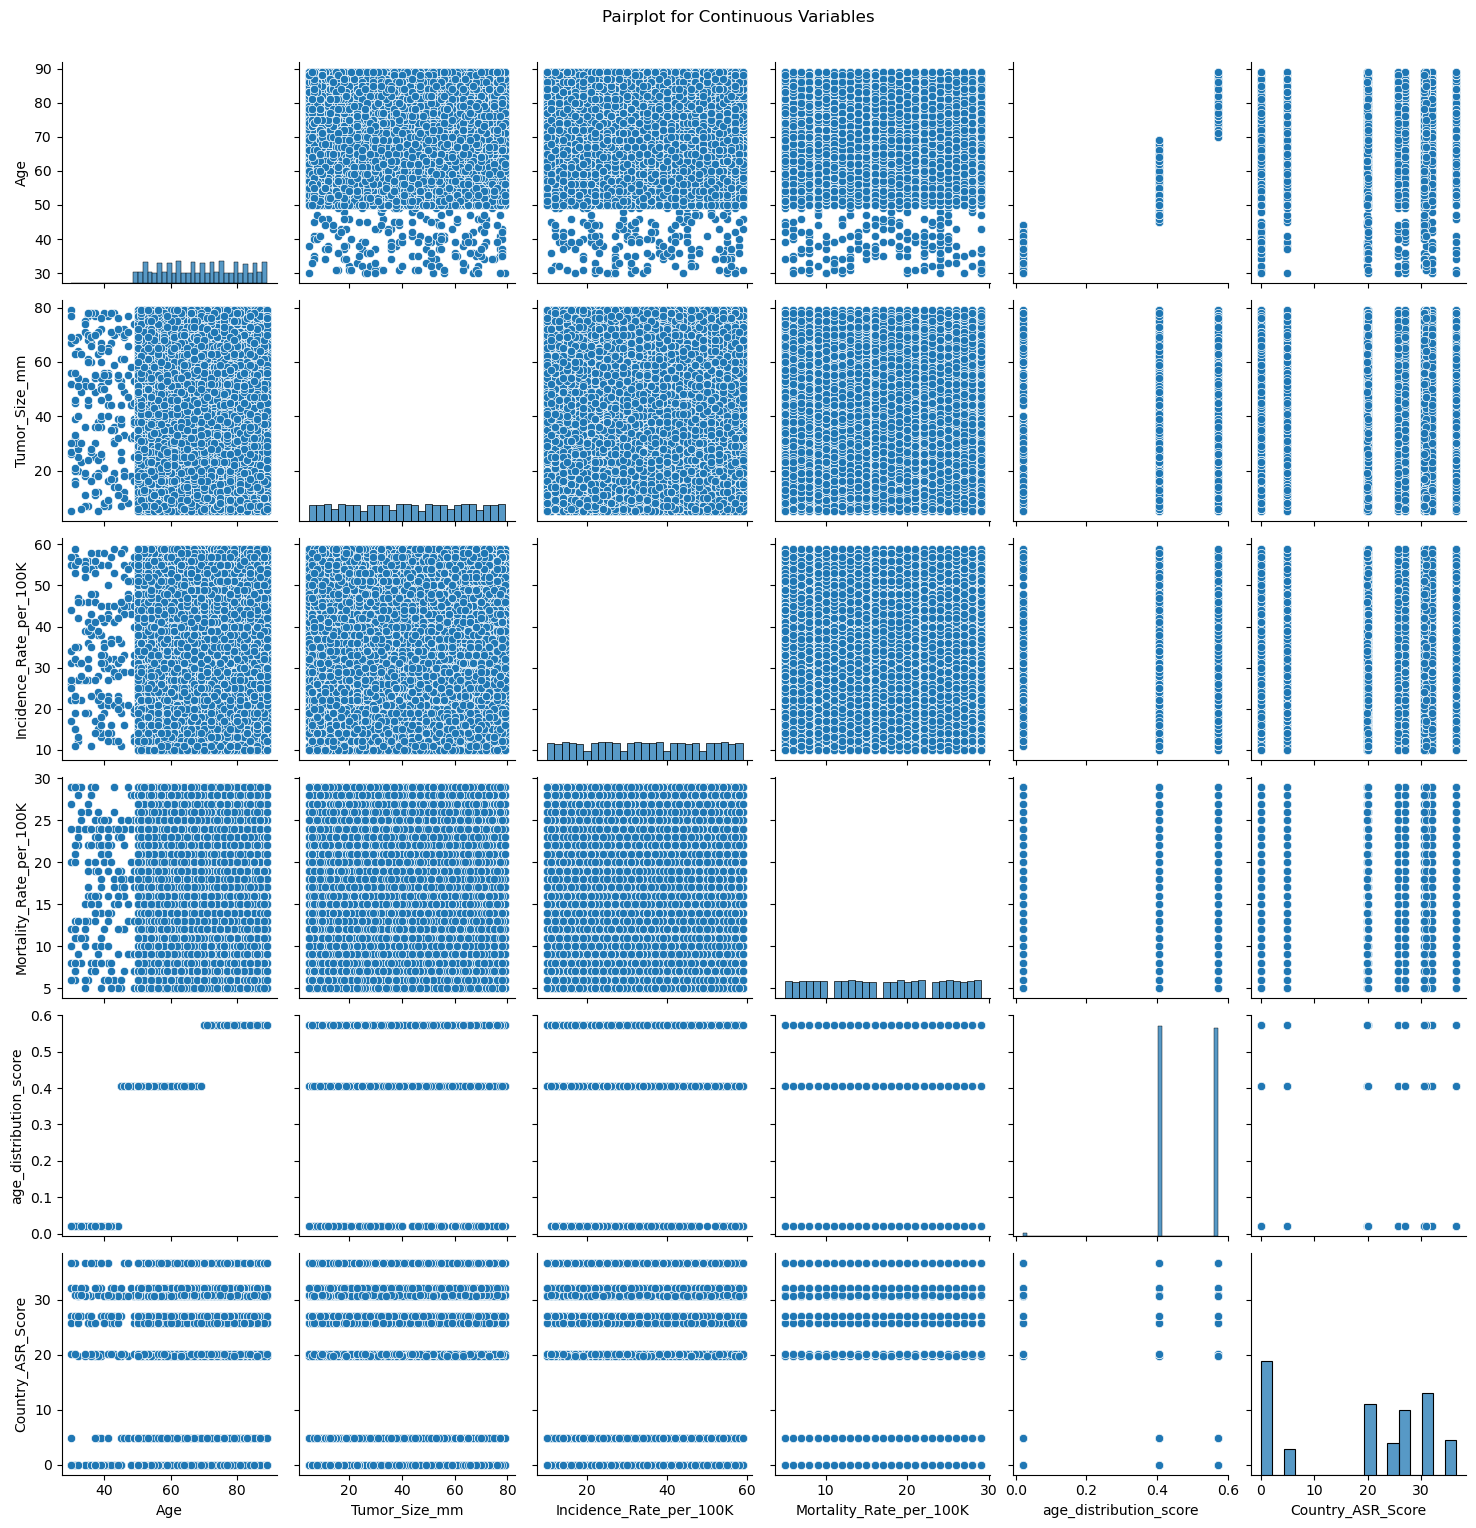

In [225]:
sns.pairplot(df[['Age','Tumor_Size_mm','Incidence_Rate_per_100K',
                 'Mortality_Rate_per_100K','age_distribution_score',
                'Country_ASR_Score']])
plt.suptitle('Pairplot for Continuous Variables', y=1.02)
plt.show()

### Continent-based Analysis

In [197]:
country_to_continent = {
    # North America
    'USA': 'North America', 'Canada': 'North America', 'Mexico': 'North America', 
    'Guatemala': 'North America', 'Honduras': 'North America', 'Costa Rica': 'North America', 
    'Panama': 'North America', 'Cuba': 'North America', 'Dominican Republic': 'North America', 
    'Jamaica': 'North America', 'Trinidad and Tobago': 'North America', 'Barbados': 'North America', 
    
    # South America
    'Brazil': 'South America', 'Argentina': 'South America', 'Colombia': 'South America', 
    'Chile': 'South America', 'Peru': 'South America', 'Venezuela': 'South America', 
    'Ecuador': 'South America', 'Bolivia': 'South America', 'Paraguay': 'South America', 
    'Uruguay': 'South America', 'Guyana': 'South America', 'Suriname': 'South America', 
    'French Guiana': 'South America',

    # Europe
    'Germany': 'Europe', 'France': 'Europe', 'UK': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe', 
    'Russia': 'Europe', 'Ukraine': 'Europe', 'Poland': 'Europe', 'Romania': 'Europe', 'Netherlands': 'Europe', 
    'Belgium': 'Europe', 'Greece': 'Europe', 'Czech Republic': 'Europe', 'Portugal': 'Europe', 
    'Sweden': 'Europe', 'Hungary': 'Europe', 'Belarus': 'Europe', 'Austria': 'Europe', 'Switzerland': 'Europe', 
    'Bulgaria': 'Europe', 'Serbia': 'Europe', 'Croatia': 'Europe', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 
    'Norway': 'Europe', 'Finland': 'Europe', 'Denmark': 'Europe', 'Ireland': 'Europe', 'Lithuania': 'Europe', 
    'Latvia': 'Europe', 'Estonia': 'Europe', 'Moldova': 'Europe', 'Albania': 'Europe', 'North Macedonia': 'Europe', 
    'Kosovo': 'Europe', 'Monaco': 'Europe', 'Andorra': 'Europe', 'Liechtenstein': 'Europe', 'San Marino': 'Europe', 
    'Vatican City': 'Europe', 'Malta': 'Europe',

    # Asia
    'China': 'Asia', 'India': 'Asia', 'Japan': 'Asia', 'South Korea': 'Asia', 'Indonesia': 'Asia', 
    'Pakistan': 'Asia', 'Bangladesh': 'Asia', 'Russia': 'Asia', 'Vietnam': 'Asia', 'Philippines': 'Asia', 
    'Turkey': 'Asia', 'Iran': 'Asia', 'Saudi Arabia': 'Asia', 'Iraq': 'Asia', 'Afghanistan': 'Asia', 
    'Uzbekistan': 'Asia', 'Malaysia': 'Asia', 'Yemen': 'Asia', 'Nepal': 'Asia', 'Sri Lanka': 'Asia', 
    'Kazakhstan': 'Asia', 'Syria': 'Asia', 'Cambodia': 'Asia', 'Jordan': 'Asia', 'Azerbaijan': 'Asia', 
    'United Arab Emirates': 'Asia', 'Tajikistan': 'Asia', 'Israel': 'Asia', 'Laos': 'Asia', 'Kyrgyzstan': 'Asia', 
    'Turkmenistan': 'Asia', 'Singapore': 'Asia', 'Oman': 'Asia', 'State of Palestine': 'Asia', 
    'Kuwait': 'Asia', 'Mongolia': 'Asia', 'Armenia': 'Asia', 'Qatar': 'Asia', 'Bahrain': 'Asia', 
    'Timor-Leste': 'Asia', 'Cyprus': 'Asia',

    # Africa
    'South Africa': 'Africa', 'Nigeria': 'Africa', 'Kenya': 'Africa', 'Uganda': 'Africa', 
    'Algeria': 'Africa', 'Sudan': 'Africa', 'Morocco': 'Africa', 'Angola': 'Africa', 'Mozambique': 'Africa', 
    'Ghana': 'Africa', 'Madagascar': 'Africa', 'Cameroon': 'Africa', 'Côte d\'Ivoire': 'Africa', 
    'Niger': 'Africa', 'Burkina Faso': 'Africa', 'Mali': 'Africa', 'Malawi': 'Africa', 'Zambia': 'Africa', 
    'Senegal': 'Africa', 'Chad': 'Africa', 'Rwanda': 'Africa', 'Guinea': 'Africa', 'Benin': 'Africa', 
    'Burundi': 'Africa', 'Tunisia': 'Africa', 'South Sudan': 'Africa', 'Tanzania': 'Africa', 
    'Somalia': 'Africa', 'Togo': 'Africa', 'Sierra Leone': 'Africa', 'Libya': 'Africa', 'Congo': 'Africa', 
    'Liberia': 'Africa', 'Mauritius': 'Africa', 'Eswatini': 'Africa', 'Equatorial Guinea': 'Africa', 
    'Djibouti': 'Africa', 'Comoros': 'Africa', 'Seychelles': 'Africa', 'Central African Republic': 'Africa', 
    'Gabon': 'Africa', 'Lesotho': 'Africa', 'Mauritania': 'Africa', 'Eritrea': 'Africa',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania', 'Papua New Guinea': 'Oceania', 
    'Fiji': 'Oceania', 'Solomon Islands': 'Oceania', 'Vanuatu': 'Oceania', 'Samoa': 'Oceania', 
    'Tonga': 'Oceania', 'Micronesia': 'Oceania', 'Palau': 'Oceania', 'Marshall Islands': 'Oceania', 
    'Nauru': 'Oceania', 'Tuvalu': 'Oceania', 'Kiribati': 'Oceania'
}


In [203]:
# Assuming your dataframe is named `df` and has a 'Country' column
# Map countries to continents
df['Continent'] = df['Country'].map(country_to_continent)
df[['Continent','Country']].head(10)

Continent  Country
0         Europe       UK
1         Europe       UK
2           Asia    Japan
3  North America      USA
4         Europe   France
5           Asia    Japan
6  North America   Canada
7         Europe  Germany
8  North America      USA
9           Asia    Japan

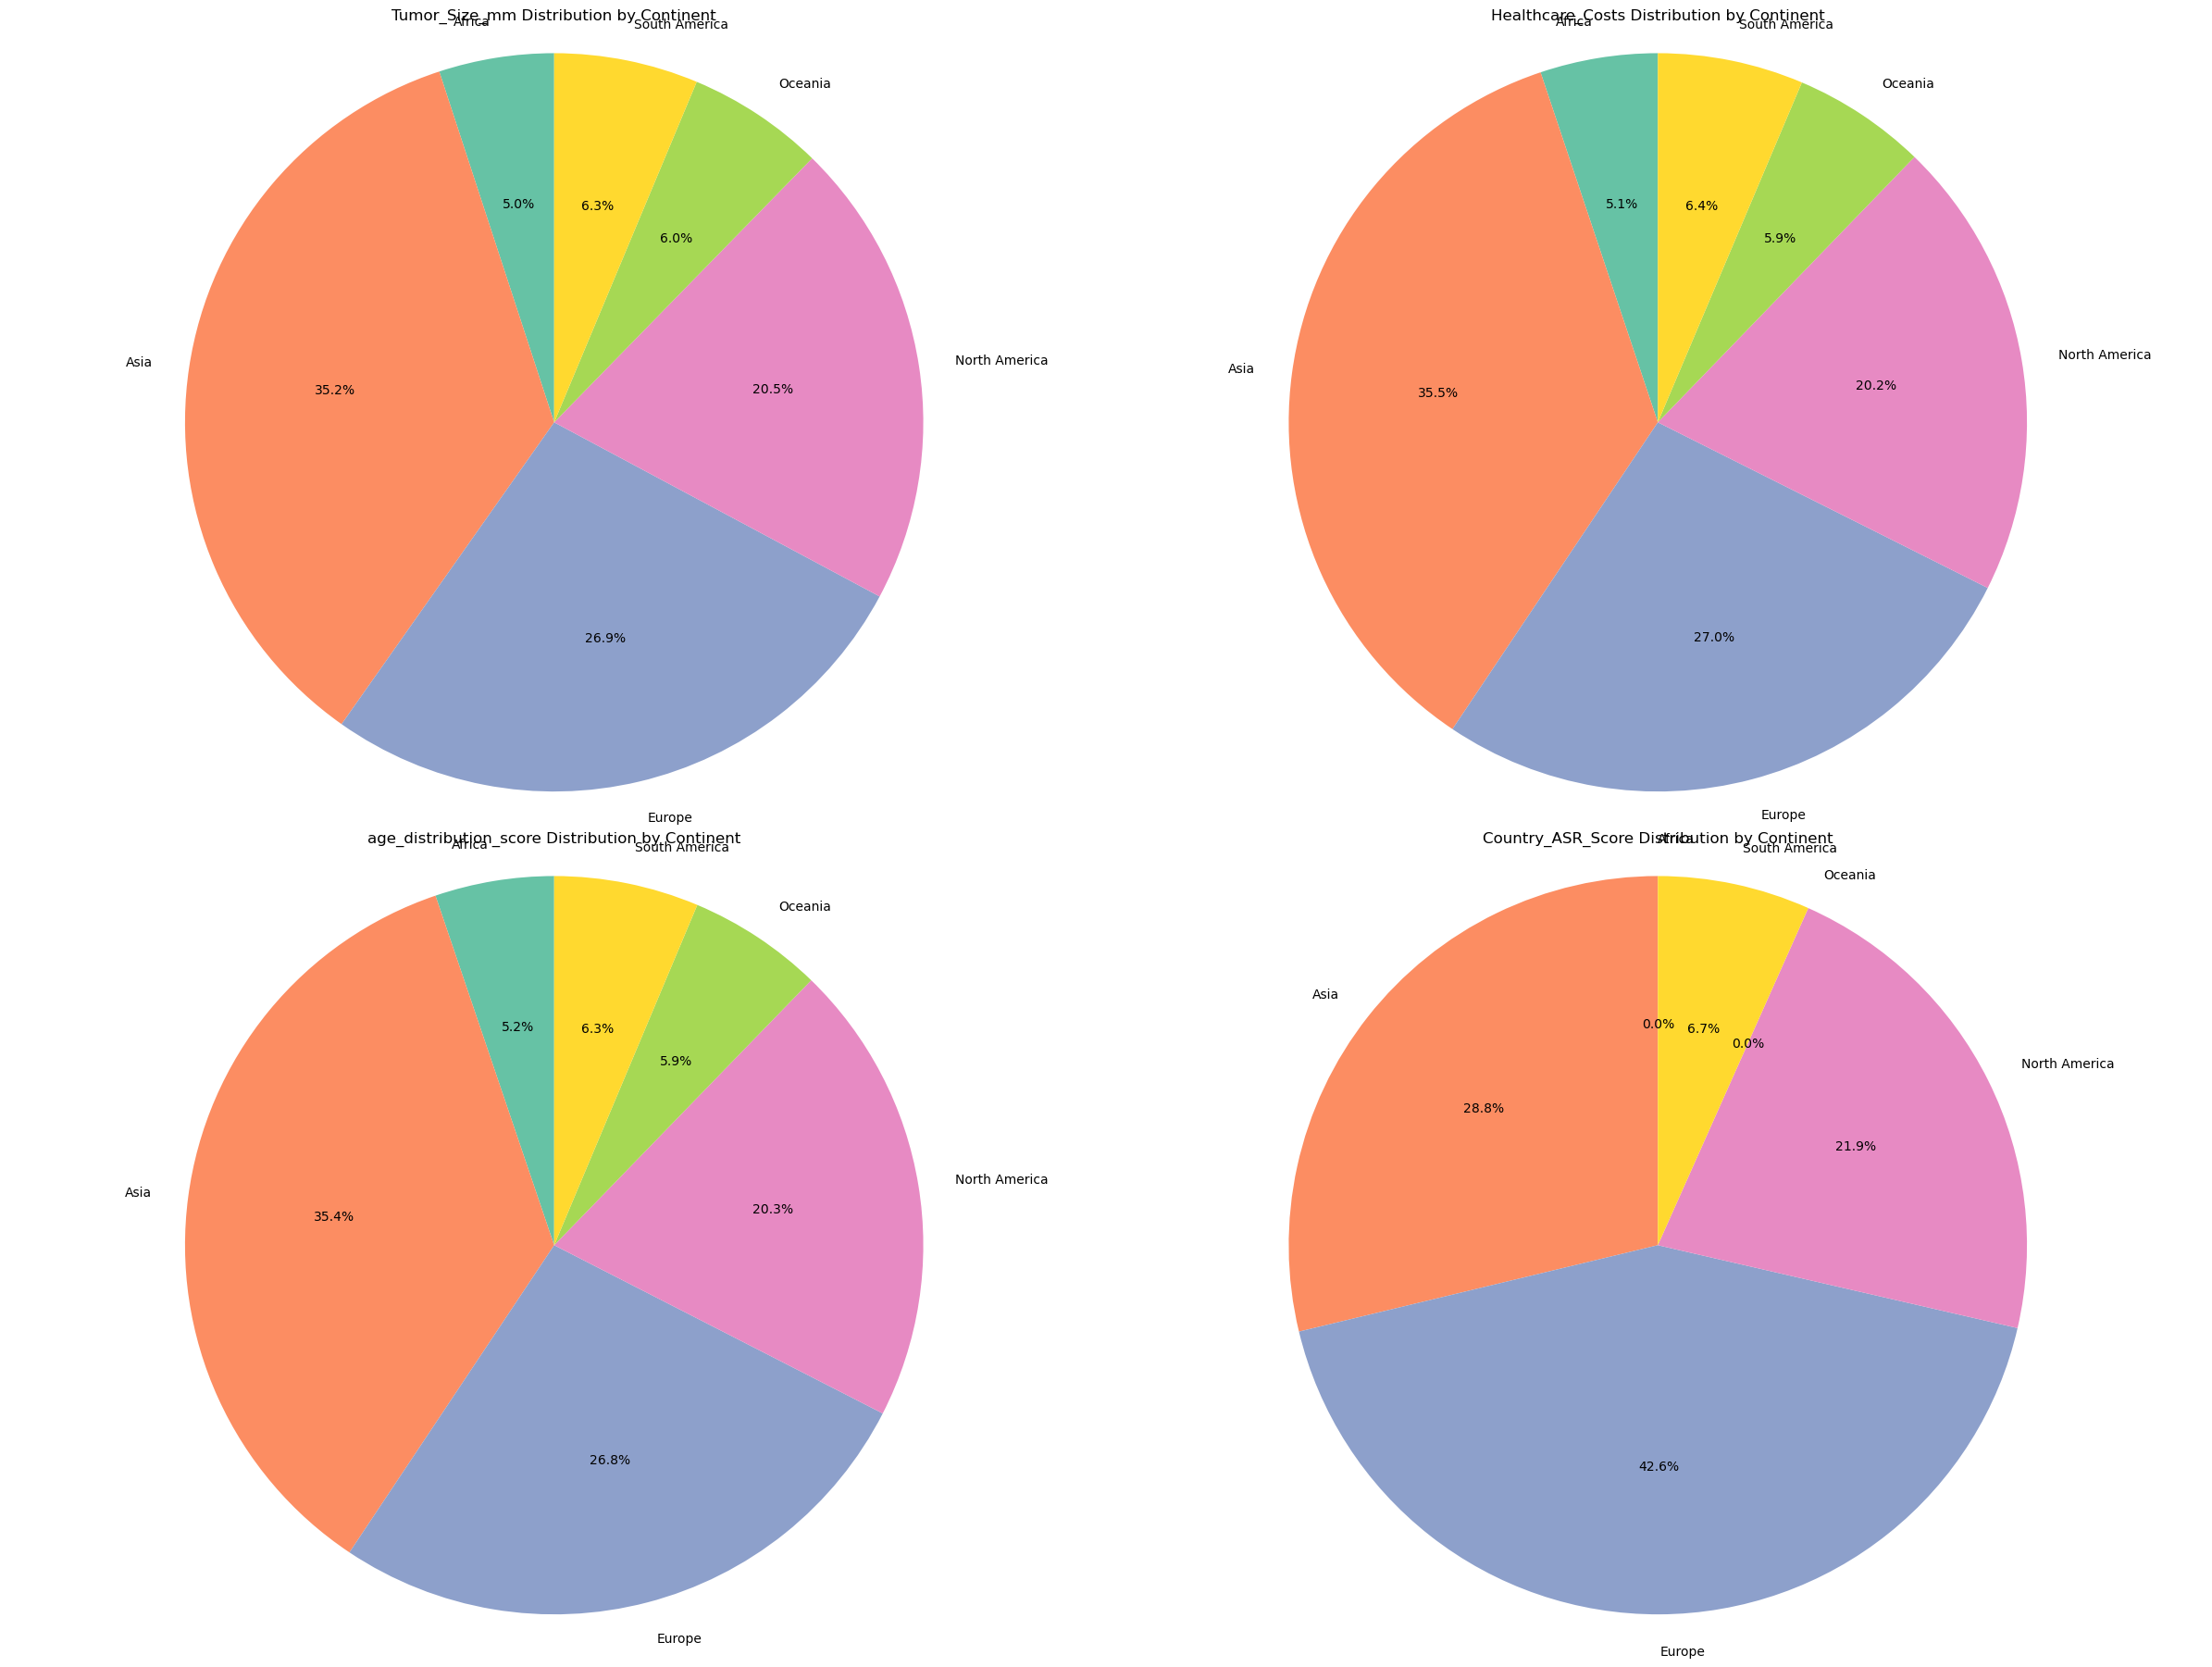

In [250]:
# Define the numerical columns from which we will calculate the total score
numerical_vars = ['Tumor_Size_mm', 'Healthcare_Costs', 'age_distribution_score', 'Country_ASR_Score']

# Set the figure size for the pie charts
plt.figure(figsize=(24, 18))

# Iterate through each of the numerical columns
for i, var in enumerate(numerical_vars, 1):
    # Group the data by 'Continent' and calculate the sum of the current variable
    continent_scores = df.groupby('Continent')[var].sum().reset_index()

    # Create a pie chart for the current variable
    plt.subplot(2, 2, i)  # 2 rows and 2 columns to fit all the pie charts
    plt.pie(continent_scores[var], labels=continent_scores['Continent'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(continent_scores)))
    
    # Add title
    plt.title(f'{var} Distribution by Continent')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

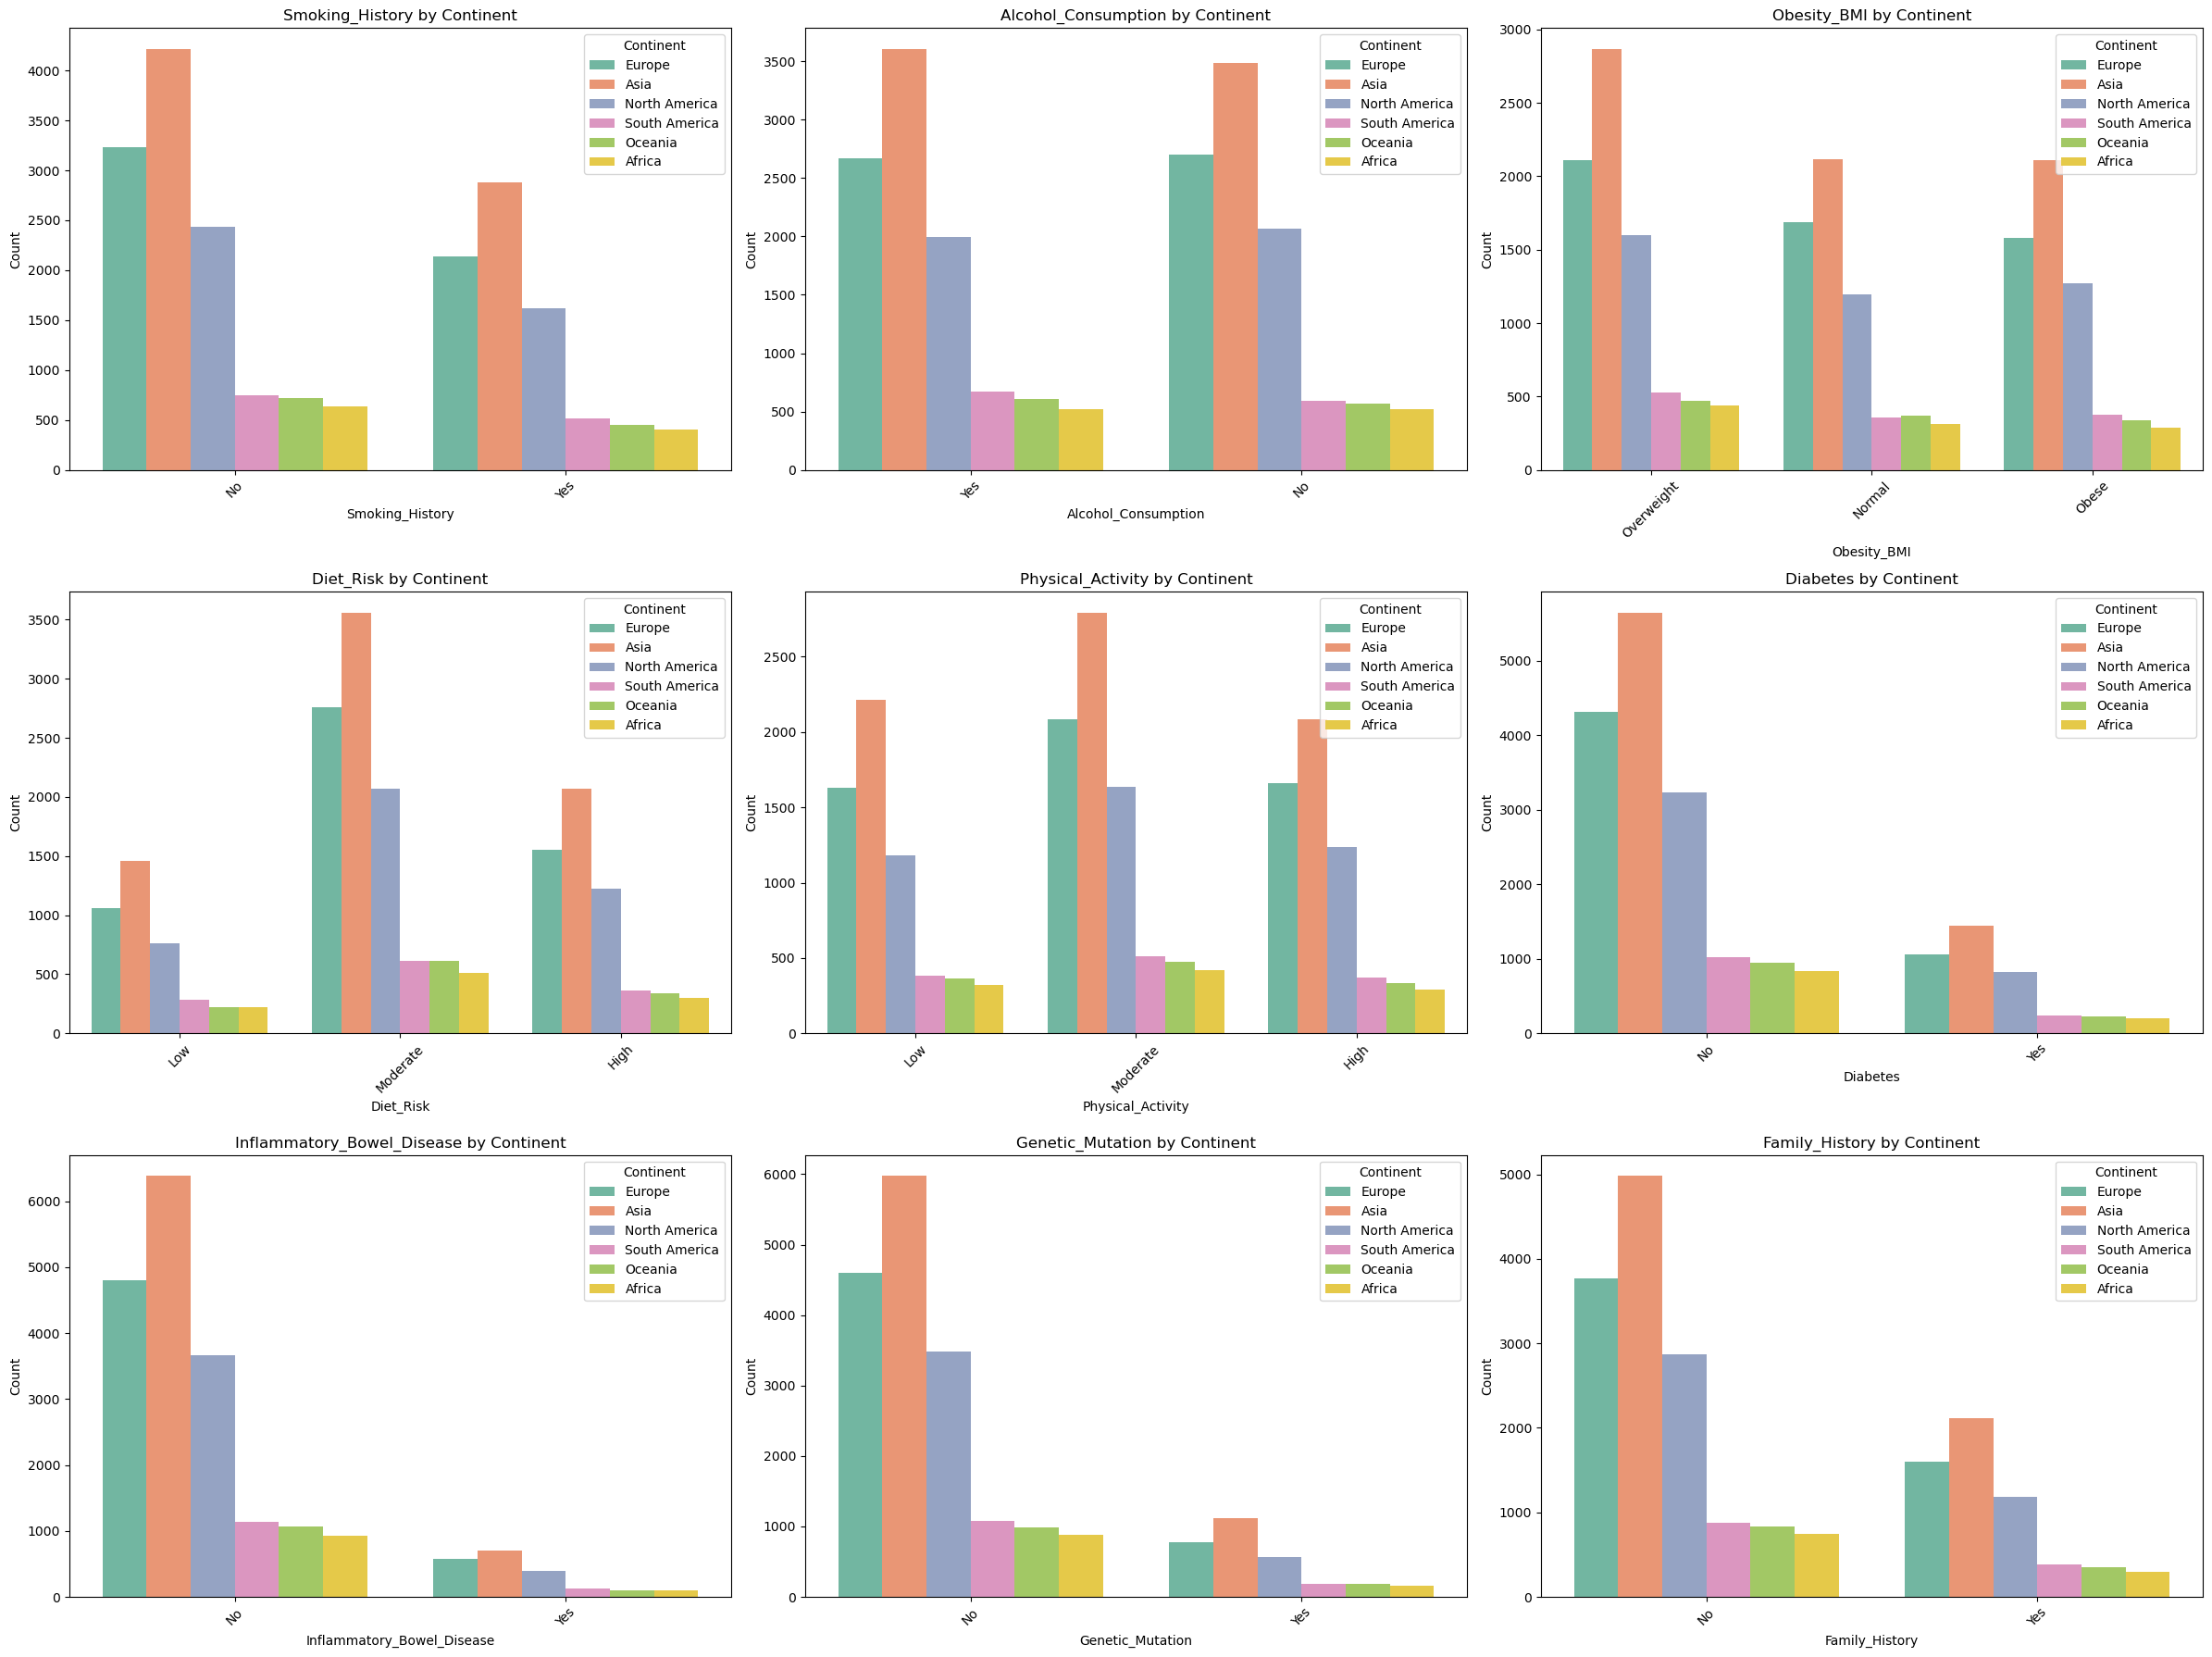

In [252]:
categorical_vars = ['Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 
                    'Diet_Risk', 'Physical_Activity', 'Diabetes', 
                    'Inflammatory_Bowel_Disease','Genetic_Mutation','Family_History']

# Set the figure size for the subplots
plt.figure(figsize=(24, 18))

# Iterate through each categorical variable to create plots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)  # 3 rows and 3 columns to fit all the plots
    sns.countplot(data=df, x=var, hue='Continent', palette='Set2')
    plt.title(f'{var} by Continent')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [254]:
# Check the unique values and the distribution of the survival ratio
print(df['Survival_5_years_numerical'].value_counts())

Survival_5_years_numerical
1    11999
0     8001
Name: count, dtype: int64


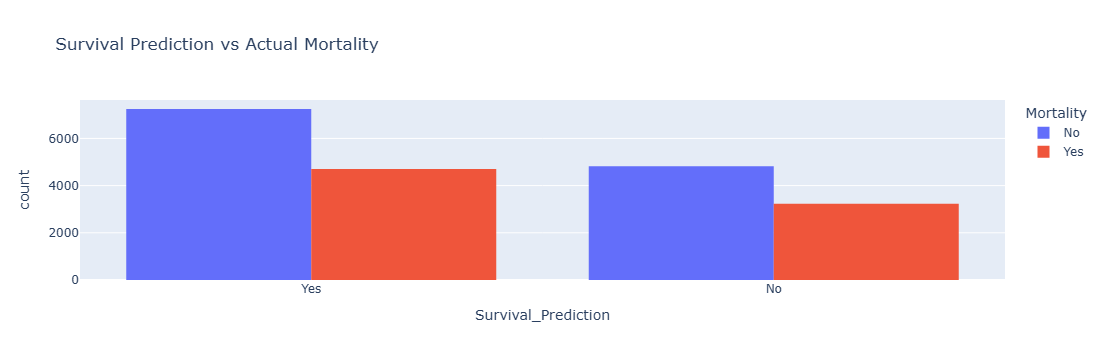

In [88]:
# 5.4 Survival Prediction vs Mortality (Plotly)
fig4 = px.histogram(df, x='Survival_Prediction', color='Mortality', 
                    barmode='group', title='Survival Prediction vs Actual Mortality')
fig4.show()

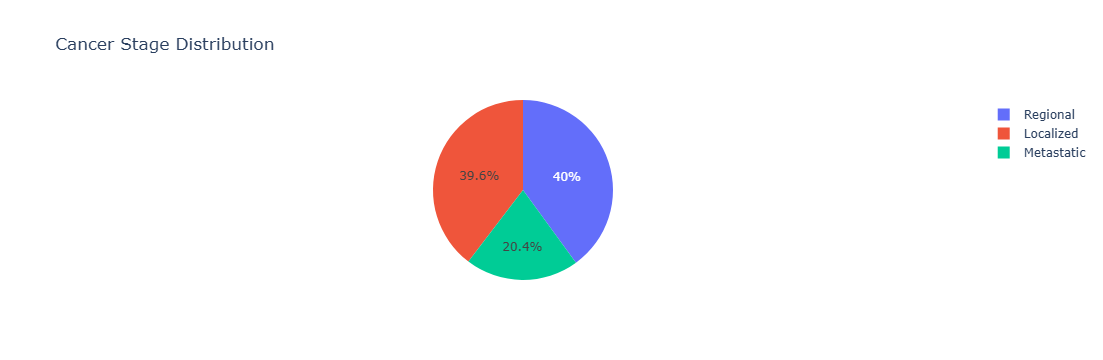

In [82]:
# 5. Interactive Plotly Charts

# 5.1 Pie Chart: Distribution of Cancer Stage
fig1 = px.pie(df, names='Cancer_Stage', title='Cancer Stage Distribution')
fig1.show()


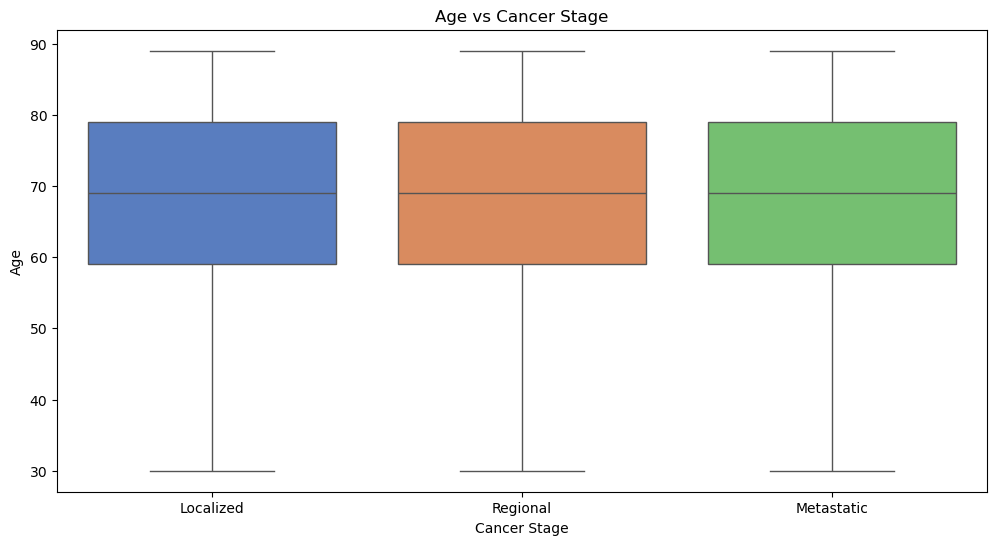

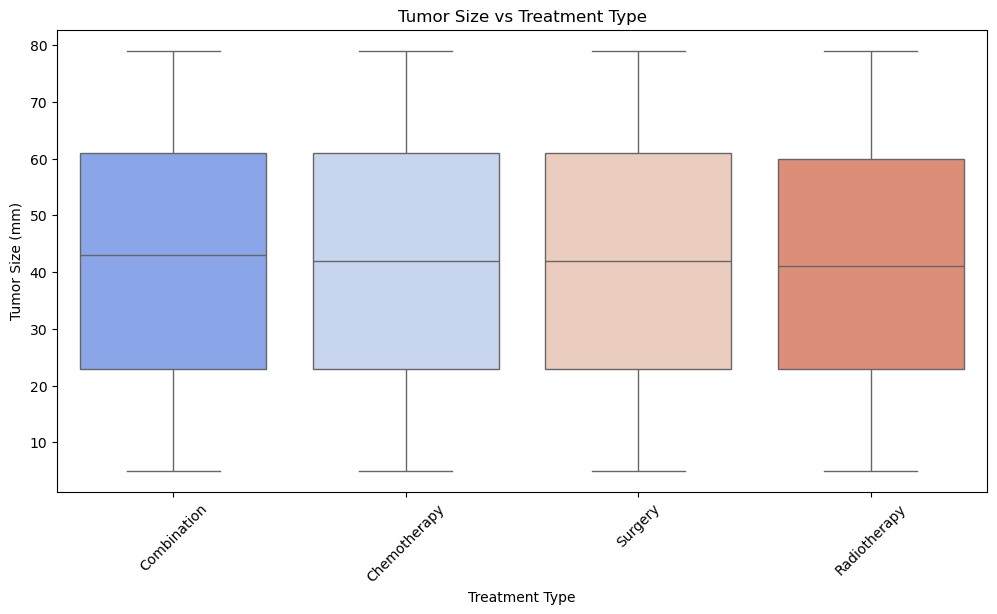

In [76]:
# 2. Box Plot for Continuous Variables by Categorical Data
plt.figure(figsize=(12, 6))

# Age vs Cancer Stage
sns.boxplot(data=df, x='Cancer_Stage', y='Age', palette='muted')
plt.title('Age vs Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Age')
plt.show()

# Tumor Size vs Treatment Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Treatment_Type', y='Tumor_Size_mm', palette='coolwarm')
plt.title('Tumor Size vs Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Tumor Size (mm)')
plt.xticks(rotation=45)
plt.show()


## Hypothesis Testing

#### Null and Alternative Hypotheses

- **Null Hypothesis ($\large{H_0}$)**: There is no significant difference in the survival rates between patients in the American continents and other continents.
- **Alternative Hypothesis ($\large{H_A}$)**: Colorectal cancer patients in the American continents have lower survival rates compared to other continents.

#### Test Type Selection

- Since Survival_5_years and Mortality across continents will be used, which are all categorical variable, and we are interested in determining if there is a significant difference, the Chi-Square Test of Independence is appropriate. This test will check if there is a significant association between Continent and Survival_5_years and Mortality.

#### Chi-Square Statistic Test

In [299]:
import scipy.stats as stats

# Define the columns you want to perform the test on
columns_to_test = ['Survival_5_years_numerical', 'Mortality']

# Iterate through each column and perform the Chi-Square test
for column in columns_to_test:
    print(f"\nPerforming Chi-Square test for {column} by Continent\n" + "-"*50)

    # 1. Create a contingency table for Continent and the selected column
    contingency_table = pd.crosstab(df['Continent'], df[column])

    # 2. Perform the Chi-Square test of independence
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    # 3. Print the results
    print("Chi-Square Statistic:", chi2_stat)
    print("p-value:", p_value)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies Table:\n", expected)
    print()
    # 4. Conclusion based on p-value
    alpha = 0.05  # Significance level
    
    if p_value <= alpha:
        print(f"Reject the Null Hypothesis for {column}: There is a significant relationship between continent and {column.lower()}.")
    else:
        print(f"Fail to Reject the Null Hypothesis for {column}: No significant relationship between continent and {column.lower()}.")



Performing Chi-Square test for Survival_5_years_numerical by Continent
--------------------------------------------------
Chi-Square Statistic: 8.270593994403265
p-value: 0.14193972043960507
Degrees of Freedom: 5
Expected Frequencies Table:
 [[ 414.4518   621.5482 ]
 [2836.75455 4254.24545]
 [2150.26875 3224.73125]
 [1624.203   2435.797  ]
 [ 470.05875  704.94125]
 [ 505.26315  757.73685]]

Fail to Reject the Null Hypothesis for Survival_5_years_numerical: No significant relationship between continent and survival_5_years_numerical.

Performing Chi-Square test for Mortality by Continent
--------------------------------------------------
Chi-Square Statistic: 6.986902833242879
p-value: 0.22161618472787317
Degrees of Freedom: 5
Expected Frequencies Table:
 [[ 624.967    411.033  ]
 [4277.64575 2813.35425]
 [3242.46875 2132.53125]
 [2449.195   1610.805  ]
 [ 708.81875  466.18125]
 [ 761.90475  501.09525]]

Fail to Reject the Null Hypothesis for Mortality: No significant relationship betw

#### Results of Hypothesis Testing

- Fail to Reject the Null Hypothesis for Survival_5_years_numerical: No significant relationship between continent and survival_5_years_numerical.
- Fail to Reject the Null Hypothesis for Mortality: No significant relationship between continent and mortality.